## MELBOURNE HOUSING PROJECT

* Melbourne is currently experiencing a housing bubble (some experts say it may burst soon). Maybe someone can find a trend or give a prediction? Which suburbs are the best to buy in? Which ones are value for money? Where's the expensive side of town? And more importantly where should I buy a 2 bedroom unit?

**Content & Acknowledgements**
This data was scraped from publicly available results posted every week from Domain.com.au, I've cleaned it as best I can, now it's up to you to make data analysis magic. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

* Now with extra data including including property size, land size and council area, you may need to change your code!

**Some Key Details**  
Suburb: Suburb  
Address: Address  
Rooms: Number of rooms  
Price: Price in Australian dollars  

Method:  
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent  
Date: Date sold  
Distance: Distance from CBD in Kilometres  
Regionname: General Region (West, North West, North, North east …etc)  
Propertycount: Number of properties that exist in the suburb.  
Bedroom2 : Scraped # of Bedrooms (from different source)  
Bathroom: Number of Bathrooms  
Car: Number of carspots  
Landsize: Land Size in Metres  
BuildingArea: Building Size in Metres  
YearBuilt: Year the house was built  
CouncilArea: Governing council for the area  
Lattitude: Self explanitory  
Longtitude: Self explanitory  

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
df.shape

(34857, 21)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [6]:
df.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0
34856,Yarraville,3 Tarrengower St,2,h,1020000.0,PI,RW,24/02/2018,6.3,3013.0,2.0,1.0,0.0,250.0,103.0,1930.0,Maribyrnong City Council,-37.81810,144.89351,Western Metropolitan,6543.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [8]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [9]:
df.describe(include= 'object')

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
count,34857,34857,34857,34857,34857,34857,34854,34854
unique,351,34009,3,9,388,78,33,8
top,Reservoir,5 Charles St,h,S,Jellis,28/10/2017,Boroondara City Council,Southern Metropolitan
freq,844,6,23980,19744,3359,1119,3675,11836


### Initial Analysis:
* Size: You're working with a large dataset of 34,857 properties.

* Missing Data: As suspected, columns like Price, BuildingArea, and YearBuilt have a significant number of missing values. We'll need to handle these.

* Data Types: The columns are a mix of numbers (float64, int64) and text (object), which is typical.

In [10]:
# --- 1. Drop Unusable Rows and Columns ---
# Drop rows where the target ('Price') is missing. We can't use them.
df.dropna(subset=['Price'],inplace=True)

# Drop the 'BuildingArea' column as it's still missing too much data (>60%) to be reliable.
df.drop('BuildingArea',axis=1,inplace=True)

In [11]:
# --- 2. Advanced Imputation ---
# For 'Landsize' and 'YearBuilt', fill missing values with the median of their Suburb.
# This is much more accurate than using a global median.
df['Landsize']= df.groupby('Suburb')['Landsize'].transform(lambda x: x.fillna(x.median()))
df['YearBuilt']= df.groupby('Suburb')['YearBuilt'].transform(lambda x: x.fillna(x.median()))

# For categorical-like features, fill with the mode (most common value).
df['Car'] = df['Car'].fillna(df['Car'].mode()[0])
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].mode()[0])

# Some suburbs might still have NaN if all properties in that suburb were missing values.
# We fill these few remaining NaNs with the overall median.
df['Landsize'] = df['Landsize'].fillna(df['Landsize'].median())
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())

# Drop any other remaining nulls (should be very few, e.g., in CouncilArea, Lattitude)
df.dropna(inplace=True)

In [12]:
df.shape

(20784, 20)

In [13]:
# convert float to int 
cols_to_int = ['Bedroom2','Bathroom','Car','Propertycount']
for col in cols_to_int:
    df[col]=df[col].astype(int)
# convert float to object(str)
df['Postcode']=df['Postcode'].astype(str)

## FEATURE ENGINEERING

In [14]:
# Create 'Age' from 'YearBuilt'
# Now that 'YearBuilt' is filled, we can create a powerful 'Age' feature.
df['Age']=2024 - df['YearBuilt']

# --- 4. Log Transformation of Skewed Features ---
# This normalizes the distribution and helps the model handle outliers.
df['Price_log']= np.log1p(df['Price'])
df['Landsize_log']=np.log1p(df['Landsize'])

In [15]:
# Extract numerical features from 'Date' column
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['SaleYear'] = df['Date'].dt.year
df['SaleMonth'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['SalePeriod']=df['Date'].dt.to_period('M')
monthly_prices = df.groupby('SalePeriod')['Price'].median().reset_index()
monthly_prices['SalePeriod'] = monthly_prices['SalePeriod'].dt.to_timestamp()

In [16]:
# Drop original columns that are now redundant or not useful for the model.
df.drop(['YearBuilt','Date', 'Address'], axis=1, inplace=True)
print(f"Shape after cleaning and feature engineering: {df.shape}\n")

Shape after cleaning and feature engineering: (20784, 24)



## EDA

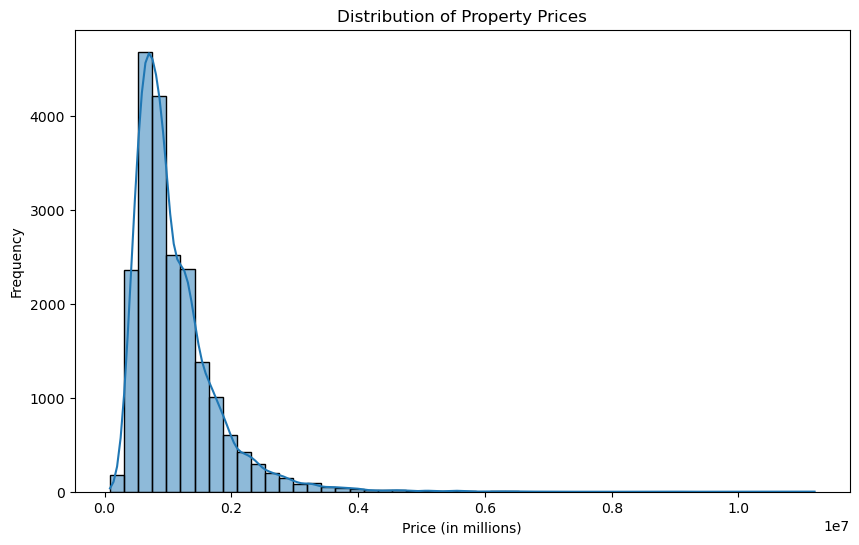

In [48]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=50)
plt.title('Distribution of Property Prices')
plt.xlabel('Price (in millions)')
plt.ylabel('Frequency')
plt.savefig('price_distribution.png')

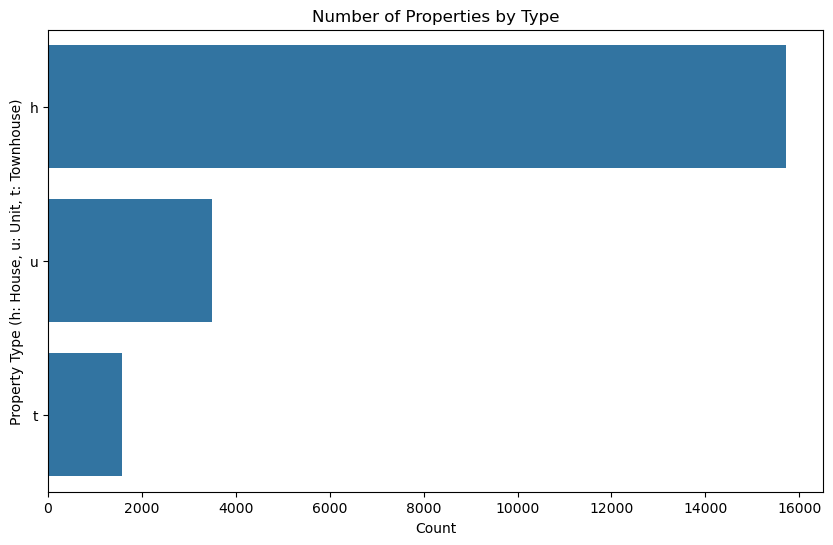

In [49]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Type', data=df, order=df['Type'].value_counts().index)
plt.title('Number of Properties by Type')
plt.xlabel('Count')
plt.ylabel('Property Type (h: House, u: Unit, t: Townhouse)')
plt.savefig('property_type_count.png') 

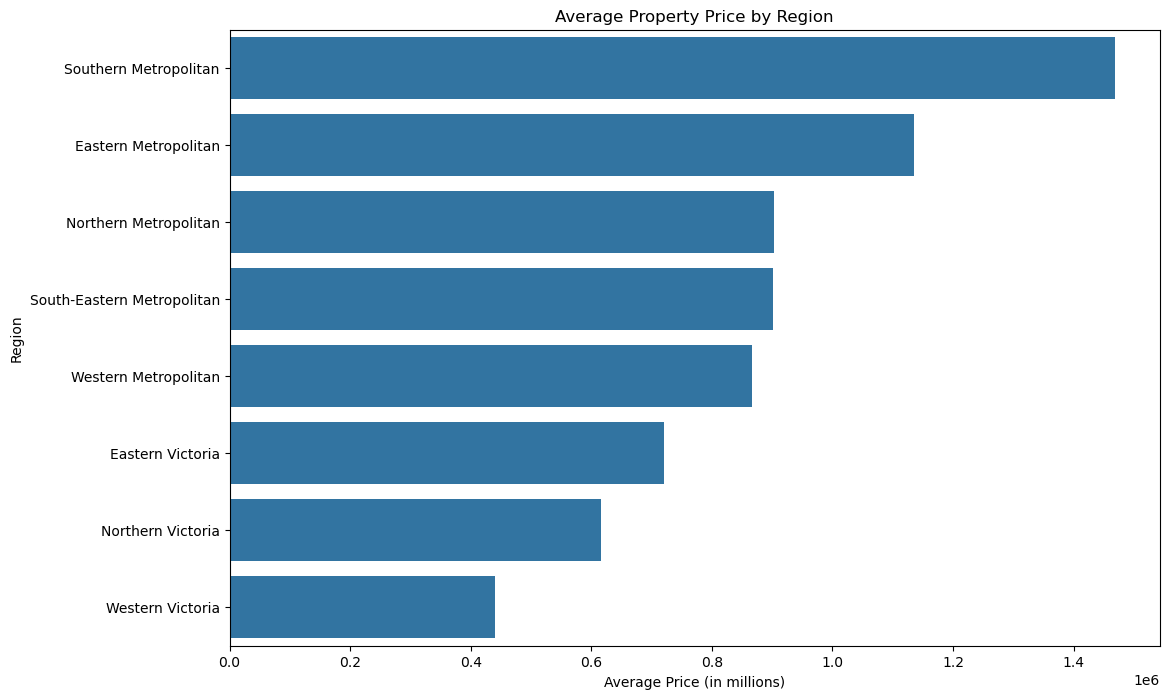

In [50]:
plt.figure(figsize=(12, 8))
# We calculate the mean price for each region and sort it for a clear chart
region_order = df.groupby('Regionname')['Price'].mean().sort_values(ascending=False).index
sns.barplot(y='Regionname', x='Price', data=df, estimator='mean', errorbar=None, order=region_order)
plt.title('Average Property Price by Region')
plt.xlabel('Average Price (in millions)')
plt.ylabel('Region')
plt.savefig('avg_price_by_region.png')

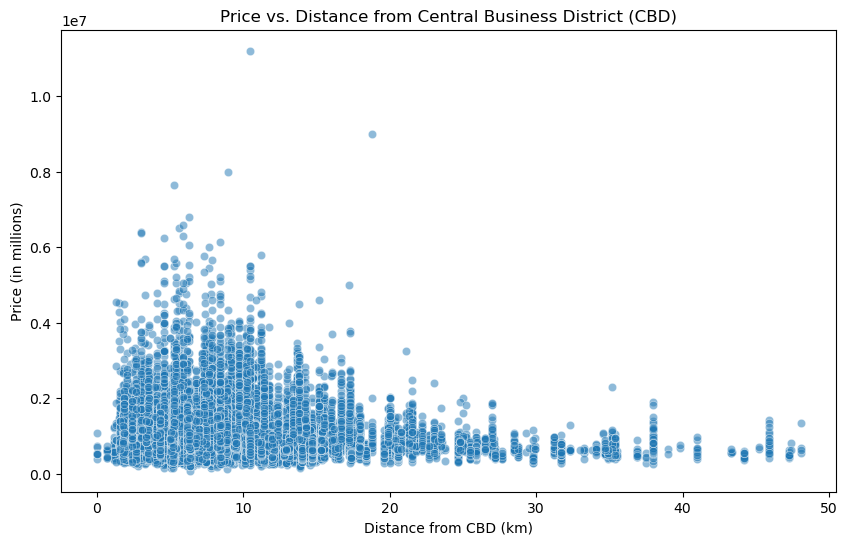

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Price', data=df, alpha=0.5)
plt.title('Price vs. Distance from Central Business District (CBD)')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Price (in millions)')
plt.savefig('price_vs_distance.jpg')

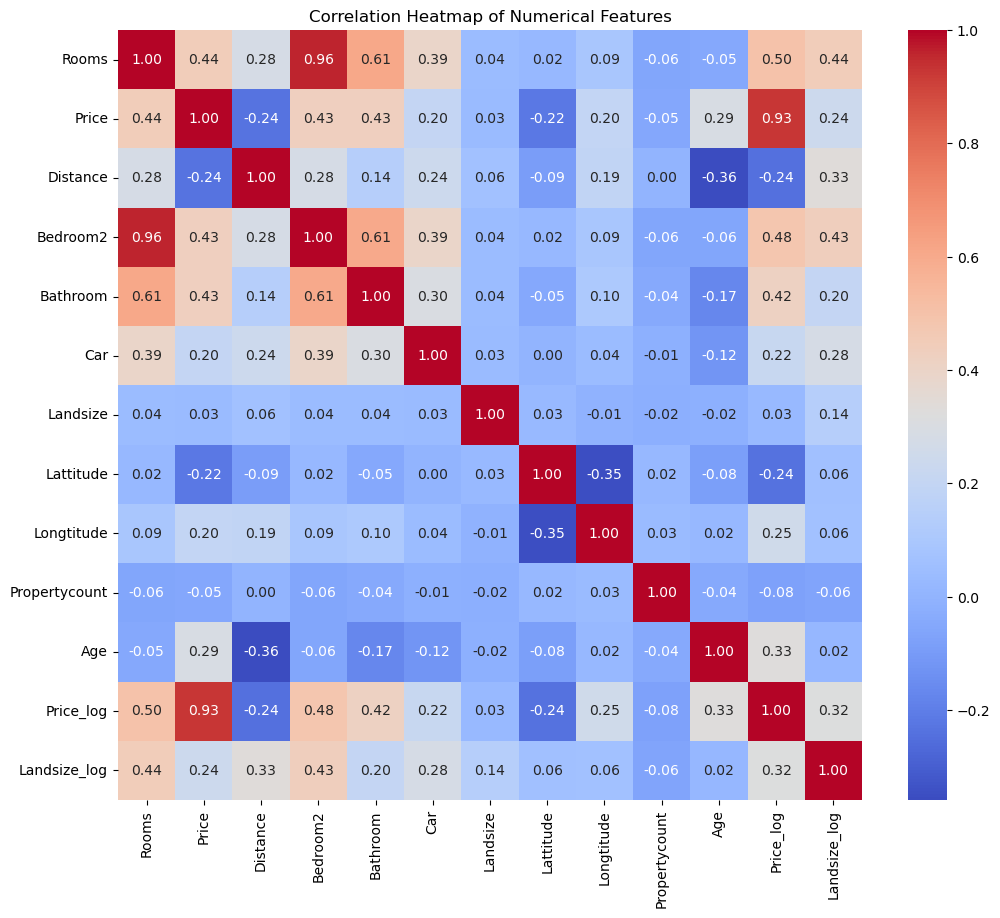

In [52]:
plt.figure(figsize=(12, 10))
numerical_cols = df.select_dtypes(include=['float64','int64'])
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.savefig('Correlation Heatmap of Numerical Features.jpg')

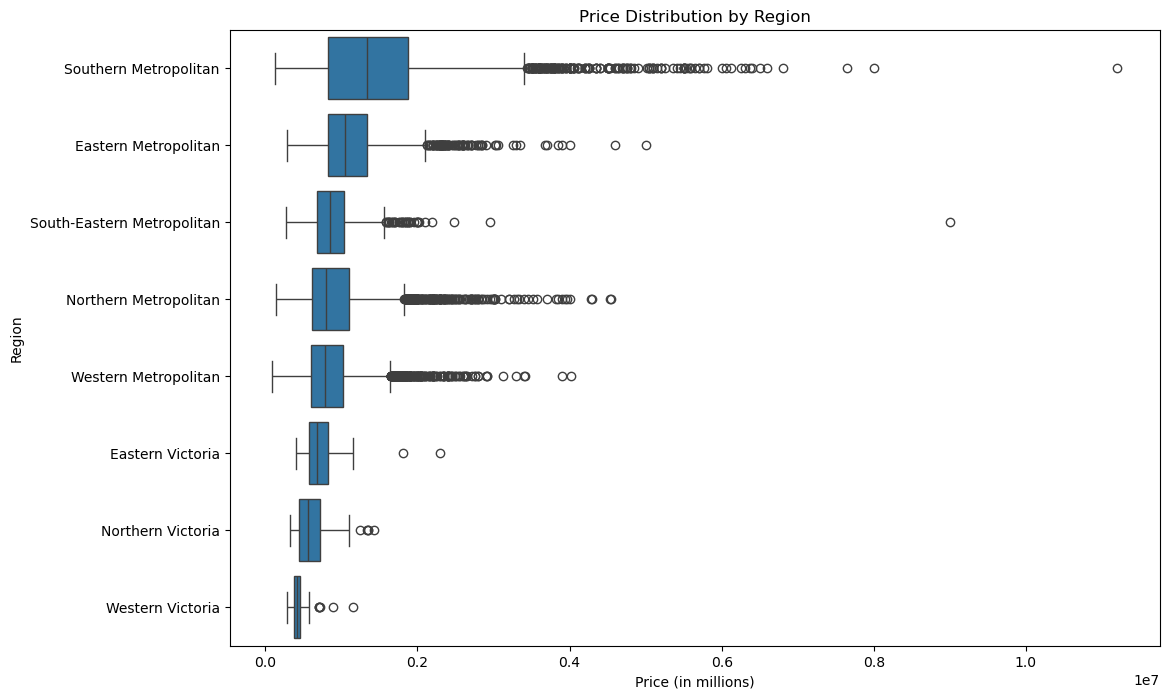

In [53]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Price',y='Regionname',data=df, orient='h',order=df.groupby('Regionname')['Price'].median().sort_values(ascending=False).index)
plt.title('Price Distribution by Region')
plt.xlabel('Price (in millions)')
plt.ylabel('Region')
plt.savefig('Price Distribution by Region.png')

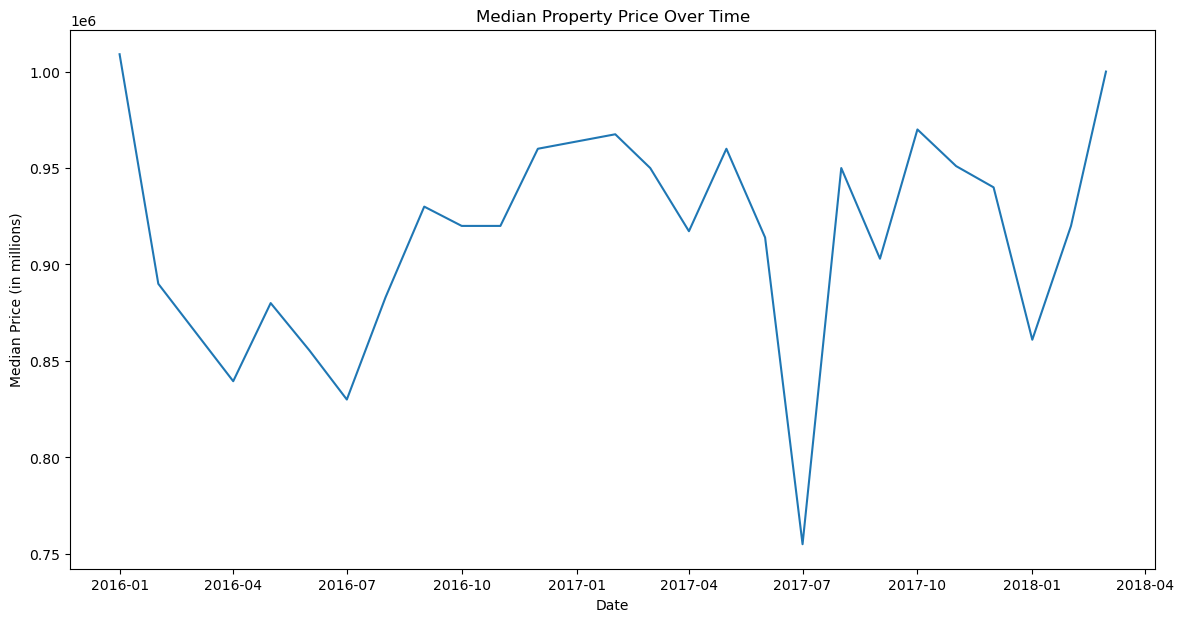

In [54]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='SalePeriod',y='Price',data=monthly_prices)
plt.title('Median Property Price Over Time')
plt.xlabel('Date')
plt.ylabel('Median Price (in millions)')
plt.savefig('Median Property Price Over Time.png')

In [20]:
#!pip install folium
import folium

In [21]:
# To avoid crashing, we'll plot a sample of 1000 properties
df_sample = df.sample(n=1000,random_state=42)

melbourne_map = folium.Map(location=[-37.8136, 144.9631], zoom_start=11)

for idx, row in df_sample.iterrows():
    folium.CircleMarker(
        location=[row['Lattitude'],row['Longtitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f"Price: ${row['Price']:,.0f}"
    ).add_to(melbourne_map)

In [22]:
melbourne_map.save('melbourne_price_map.html')

In [23]:
melbourne_map

## PREPROCESSING FOR MODELING

In [24]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

X = df.drop(['Price','Price_log','Landsize','SalePeriod'], axis=1)
y = df['Price_log']
X_encoded = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y,test_size=0.2, random_state=42)

## MODEL BUILDING & TRAINING

In [25]:
xgb_model = XGBRegressor(n_estimators=1000,
                        learning_rate=0.05,
                        n_jobs=1,
                        random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=1000,
             n_jobs=1, num_parallel_tree=None, ...)

##  MODEL EVALUATION 

In [26]:
# make predictions on the test data
y_pred_log = xgb_model.predict(X_test)

# Reverse the log transformation to get predictions in dollar amounts
y_test_actual = np.expm1(y_test)
y_pred_actual = np.expm1(y_pred_log)

In [27]:
from sklearn import metrics

In [28]:
# Calculate Evaluation Metrics
mae = metrics.mean_absolute_error(y_test_actual,y_pred_actual)
mse = metrics.mean_squared_error(y_test_actual,y_pred_actual)
rmse = np.sqrt(metrics.mean_squared_error(y_test_actual,y_pred_actual))
r2 = metrics.r2_score(y_test_actual,y_pred_actual)

In [29]:
print(f"R-squared (R²) Score: {r2:.4f}")
print(f"Mean Absolute Error (MAE): ${mae:,.2f}")
print(f"Mean Squared Error (MSE): ${mse:,.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print("\n--- Interpretation ---")
print(f"Our model explains approximately {r2:.2%} of the variance in the property prices.")
print(f"On average, our model's price predictions are off by about ${mae:,.0f}.")

R-squared (R²) Score: 0.8351
Mean Absolute Error (MAE): $151,139.78
Mean Squared Error (MSE): $67,134,317,342.01
Root Mean Squared Error (RMSE): $259,102.91

--- Interpretation ---
Our model explains approximately 83.51% of the variance in the property prices.
On average, our model's price predictions are off by about $151,140.


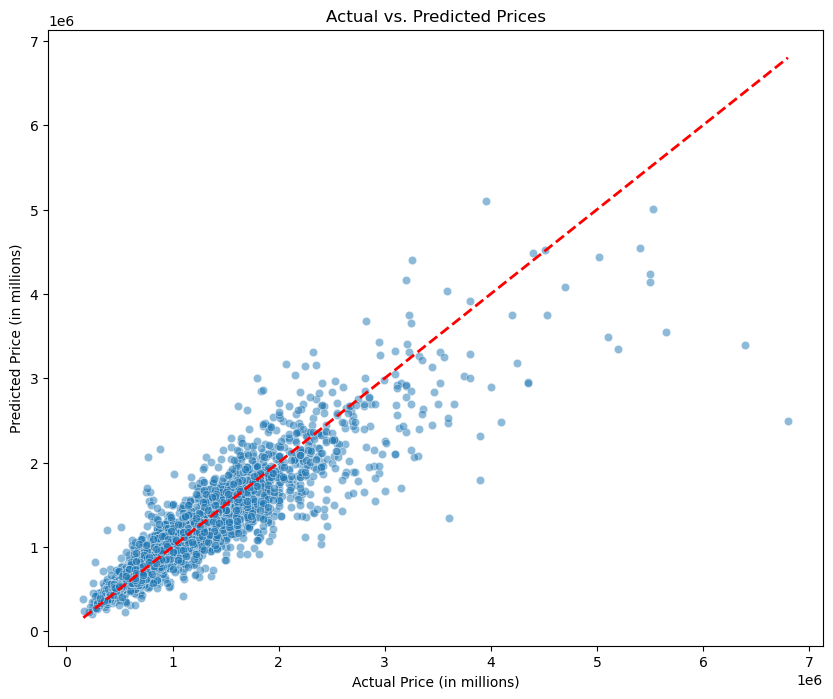

In [43]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=y_test_actual,y=y_pred_actual, alpha=0.5)
plt.plot([y_test_actual.min(),y_test_actual.max()],[y_test_actual.min(), y_test_actual.max()], '--r', linewidth=2)
plt.title('Actual vs. Predicted Prices')
plt.xlabel('Actual Price (in millions)')
plt.ylabel('Predicted Price (in millions)')
plt.savefig('actual_vs_predicted.png')

## HYPERPARAMETER TUNING 

In [31]:
from sklearn.model_selection import RandomizedSearchCV
# Hyperparameter tuning
param_grid ={
    'n_estimators':[500, 1000, 1500],
    'learning_rate':[0.01, 0.05, 0.1],
    'max_depth':[3, 4, 5, 6],
    'subsample':[0.7, 0.8, 0.9],
    'colsample_bytree':[0.7, 0.8, 0.9]
}

In [32]:
xgb_for_tuning = XGBRegressor(random_state=42,n_jobs=-1)
random_search = RandomizedSearchCV(estimator=xgb_for_tuning,
                                   param_distributions= param_grid,
                                   n_iter=25, 
                                   cv=5,
                                   verbose=2,
                                   random_state=42,
                                   scoring='r2')

In [33]:
random_search.fit(X_train, y_train)
print("\n--- Tuning Complete ---")
print(f"Best R-squared Score Found: {random_search.best_score_:.4f}")
print("Best Hyperparameters:")
print(random_search.best_params_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1500, subsample=0.7; total time=  23.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1500, subsample=0.7; total time=  26.8s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1500, subsample=0.7; total time=  24.4s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1500, subsample=0.7; total time=  24.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=1500, subsample=0.7; total time=  24.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7; total time=  10.7s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7; total time=   8.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=500, subsample=0.7; total time=   8.1s
[CV] 

In [34]:
best_xgb_model = random_search.best_estimator_


--- Tuned Model Evaluation ---
Tuned Model R-squared (R²) Score: 0.8411
Tuned Model Mean Absolute Error (MAE): $148,422.91


Text(0, 0.5, 'Predicted Price (in millions)')

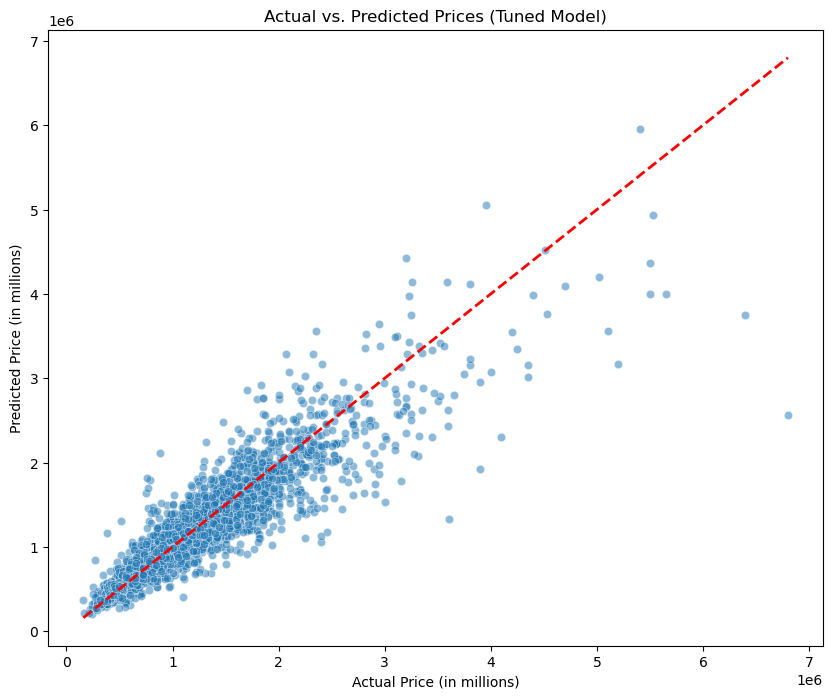

In [35]:
# --- 2. Make Predictions on the Test Set ---
# Use the tuned model to predict on the unseen test data.
y_pred_log_tuned = best_xgb_model.predict(X_test)

# --- 3. Calculate Performance Metrics ---
# Reverse the log transformation to get predictions in actual dollar amounts.
y_test_actual = np.expm1(y_test)
y_pred_actual_tuned = np.expm1(y_pred_log_tuned)

# Calculate the new metrics
mae_tuned = metrics.mean_absolute_error(y_test_actual, y_pred_actual_tuned)
r2_tuned = metrics.r2_score(y_test_actual, y_pred_actual_tuned)

print("\n--- Tuned Model Evaluation ---")
print(f"Tuned Model R-squared (R²) Score: {r2_tuned:.4f}")
print(f"Tuned Model Mean Absolute Error (MAE): ${mae_tuned:,.2f}")

# --- 4. Visualize the Improvement ---
plt.figure(figsize=(10, 8))
sns.scatterplot(x=y_test_actual, y=y_pred_actual_tuned, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], '--r', linewidth=2)
plt.title('Actual vs. Predicted Prices (Tuned Model)')
plt.xlabel('Actual Price (in millions)')
plt.ylabel('Predicted Price (in millions)')

In [38]:
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_xgb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))

Top 10 Most Important Features:
                                 feature  importance
919     Regionname_Southern Metropolitan    0.340455
351                               Type_u    0.061606
893        CouncilArea_Hume City Council    0.037048
912     CouncilArea_Wyndham City Council    0.030121
920      Regionname_Western Metropolitan    0.028635
883     CouncilArea_Bayside City Council    0.013694
884  CouncilArea_Boroondara City Council    0.013205
901      CouncilArea_Melton City Council    0.012462
19                         Suburb_Altona    0.011391
794                      Postcode_3150.0    0.009990


Text(0, 0.5, 'Feature')

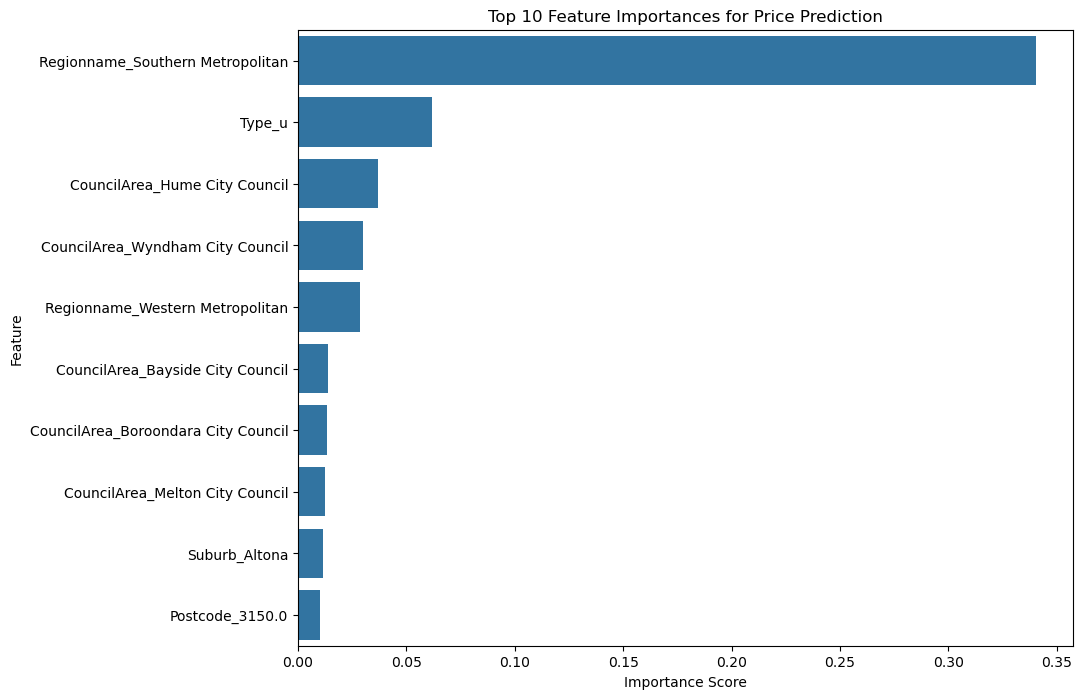

In [39]:
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(10))
plt.title('Top 10 Feature Importances for Price Prediction')
plt.xlabel('Importance Score')
plt.ylabel('Feature')

In [40]:
import joblib
import json
joblib.dump(best_xgb_model,'melbourne_house_price_model.joblib')
print(f"Model saved successfully as 'melbourne_house_price_model.joblib'")

Model saved successfully as 'melbourne_house_price_model.joblib'


In [41]:
# This is CRUCIAL for the app to create input data in the exact same format
model_columns = X_train.columns.tolist()
with open('model_columns.json', 'w') as f:
    json.dump(model_columns, f)
print("Model columns saved as 'model_columns.json'")

Model columns saved as 'model_columns.json'


In [42]:
# This will provide the list of suburbs, regions, etc., for the app's dropdown menus.
app_data = {
    'categorical_cols': {},
    'numerical_cols': X.select_dtypes(include=np.number).columns.tolist()
}
for col in X.select_dtypes(include=['object', 'category']).columns:
    app_data['categorical_cols'][col] = X[col].unique().tolist()

with open('app_data.json', 'w') as f:
    json.dump(app_data, f)
print("App data for dropdowns saved as 'app_data.json'")

App data for dropdowns saved as 'app_data.json'
